### Comparing Covid19 and MERS using Biotite

In [2]:
import biotite

# dir(biotite)

In [4]:
import biotite.sequence as seq

# dir(seq)

In [5]:
# Creating A DNA
dna = seq.NucleotideSequence('ATCTAGGAC')

# Display
print(dna)

#or

str(dna)

ATCTAGGAC


'ATCTAGGAC'

In [6]:
# Check for the Alphabet in the Nucle
print(dna.get_alphabet())

# Check for the Alphabet in the Nucle
print(dna.alphabet)

# Count/Freq of Nucl/Base in DNA
dna_freq = dna.get_symbol_frequency()
print(dna_freq)

['A', 'C', 'G', 'T']
['A', 'C', 'G', 'T']
{'A': 3, 'C': 2, 'G': 2, 'T': 2}


<BarContainer object of 4 artists>

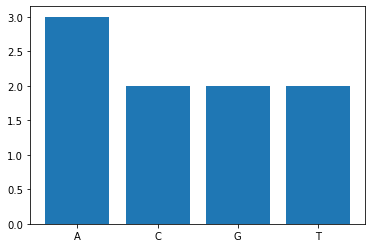

In [7]:
# Plot
import matplotlib.pyplot as plt
plt.bar(dna_freq.keys(),dna_freq.values())

In [14]:
# Methods
# dir(dna)
print(dna)

ATCTAGGAC


In [12]:
# Complement
print(dna.complement())

TAGATCCTG


In [13]:
# Reverse Complement
print(dna.reverse().complement())

GTCCTAGAT


In [16]:
# Protein
# Translation
protein = dna.translate(complete=True)

print(protein)

I*D


In [21]:
# Creating Protein Seq
protein_seq = seq.ProteinSequence("MIT")
print(protein_seq)
print('----')

for sym in protein_seq:
    print(seq.ProteinSequence.convert_letter_1to3(sym))

MIT
----
MET
ILE
THR


#### Sequence Alignment

In [23]:
# Seq Alignment
seq1 = seq.ProteinSequence("MITITET")
seq2 = seq.ProteinSequence("ITITET")

import biotite.sequence.align as align

# dir(align)

In [24]:
# SubMatrix
p_matrix = align.SubstitutionMatrix.std_protein_matrix()

print(p_matrix)

    A   C   D   E   F   G   H   I   K   L   M   N   P   Q   R   S   T   V   W   Y   B   Z   X   *
A   4   0  -2  -1  -2   0  -2  -1  -1  -1  -1  -2  -1  -1  -1   1   0   0  -3  -2  -2  -1   0  -4
C   0   9  -3  -4  -2  -3  -3  -1  -3  -1  -1  -3  -3  -3  -3  -1  -1  -1  -2  -2  -3  -3  -2  -4
D  -2  -3   6   2  -3  -1  -1  -3  -1  -4  -3   1  -1   0  -2   0  -1  -3  -4  -3   4   1  -1  -4
E  -1  -4   2   5  -3  -2   0  -3   1  -3  -2   0  -1   2   0   0  -1  -2  -3  -2   1   4  -1  -4
F  -2  -2  -3  -3   6  -3  -1   0  -3   0   0  -3  -4  -3  -3  -2  -2  -1   1   3  -3  -3  -1  -4
G   0  -3  -1  -2  -3   6  -2  -4  -2  -4  -3   0  -2  -2  -2   0  -2  -3  -2  -3  -1  -2  -1  -4
H  -2  -3  -1   0  -1  -2   8  -3  -1  -3  -2   1  -2   0   0  -1  -2  -3  -2   2   0   0  -1  -4
I  -1  -1  -3  -3   0  -4  -3   4  -3   2   1  -3  -3  -3  -3  -2  -1   3  -3  -1  -3  -3  -1  -4
K  -1  -3  -1   1  -3  -2  -1  -3   5  -2  -1   0  -1   1   2   0  -1  -2  -3  -2   0   1  -1  -4
L  -1  -1  -4  -3   

In [25]:
# SubMatrix
n_matrix = align.SubstitutionMatrix.std_nucleotide_matrix()

print(n_matrix)

    A   C   G   T
A   5  -4  -4  -4
C  -4   5  -4  -4
G  -4  -4   5  -4
T  -4  -4  -4   5


In [26]:
loc_alignments = align.align_optimal(seq1,seq2,p_matrix,local=True)

for a in loc_alignments:
    print(a)

ITITET
ITITET


In [27]:
glb_alignments = align.align_optimal(seq1,seq2,p_matrix,local=False)

for a in glb_alignments:
    print(a)

MITITET
-ITITET


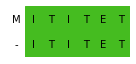

In [29]:
import matplotlib.pyplot as plt
import biotite.sequence.graphics as graphics

fig, ax = plt.subplots(figsize=(2,1))
graphics.plot_alignment_similarity_based(ax,glb_alignments[0],matrix=p_matrix,symbols_per_line=len(glb_alignments[0]))

fig.tight_layout()

In [32]:
# Alignment Score
# Seq Identity
print("Score", glb_alignments[0].score)
print("Seq Identity", align.get_sequence_identity(glb_alignments[0]))

Score 18
Seq Identity 1.0


In [33]:
seq1 == seq2

False

In [35]:
# Working with DB
import biotite.database.entrez as entrez

# dir(entrez)

In [39]:
# Get DB Name
entrez.get_database_name("Nucleotide")

# Get DB Name for Protein
entrez.get_database_name("Protein")

# Download and parse protein sequences of Covid and Mers
covid_file_path = entrez.fetch("MN908947","myresult_dir",suffix="fa",db_name="nuccore",ret_type="fasta")
mers_file_path = entrez.fetch("NC_019843.3","myresult_dir",suffix="fa",db_name="nuccore",ret_type="fasta")

covid_file_path

'myresult_dir/MN908947.fa'

In [64]:
# Reading FASTA file
import biotite.sequence.io.fasta as fasta

# Methods/Attributes
# dir(fasta)

c_file = fasta.FastaFile()
c_file.read(covid_file_path)

#print(c_file)

In [63]:
m_file = fasta.FastaFile()
m_file.read(mers_file_path)

#print(m_file)

In [41]:
print(m_file.items())

ItemsView(<biotite.sequence.io.fasta.FastaFile object at 0x7fb3dd681050>)


In [42]:
for header,s in c_file.items():
    print(header)
    print(s)
    covid_seq = seq.NucleotideSequence(s)

MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCA

In [43]:
for header,s in m_file.items():
    mers_seq = seq.NucleotideSequence(s)

#### Comparison
+ Len
+ Freq
+ Alignment
+ GC

In [44]:
# Len of Seqs
print("Len of Covid",len(covid_seq))
print("Len of Mers",len(mers_seq))

Len of Covid 29903
Len of Mers 30119


In [48]:
print("Freq of N of Covid :",(covid_seq.get_symbol_frequency()))
print("Freq of N of Mers  :",(mers_seq.get_symbol_frequency()))

Freq of N of Covid : {'A': 8954, 'C': 5492, 'G': 5863, 'T': 9594}
Freq of N of Mers  : {'A': 7900, 'C': 6116, 'G': 6304, 'T': 9799}


In [49]:
str(covid_seq).count('G')

5863

In [52]:
# GC Content of DNA
# DNA Stability :: melting temp

def gc_content(sequence):
    result = float(str(sequence).count('G') + str(sequence).count('C')) / len(sequence) * 100
    return result

print("GC Content (COVID) :",gc_content(covid_seq))
print("GC Content (MERS) :",gc_content(mers_seq))

GC Content (COVID) : 37.97277865097147
GC Content (MERS) : 41.23642883229855


<BarContainer object of 4 artists>

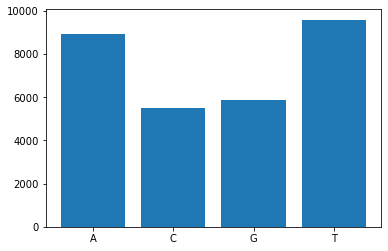

In [53]:
# Plot
freq_covid = covid_seq.get_symbol_frequency()
freq_mers  = mers_seq.get_symbol_frequency()

plt.bar(freq_covid.keys(),freq_covid.values())

<BarContainer object of 4 artists>

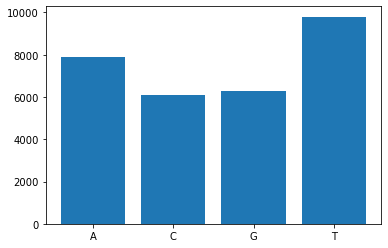

In [54]:
plt.bar(freq_mers.keys(),freq_mers.values())

In [56]:
# Sequence Alignment Between Covid and MERS
mini_covid_seq = covid_seq[0:200]
mini_mers_seq = mers_seq[0:200]

print(n_matrix)

    A   C   G   T
A   5  -4  -4  -4
C  -4   5  -4  -4
G  -4  -4   5  -4
T  -4  -4  -4   5


In [57]:
c_alignments = c_alignments = align.align_optimal(mini_covid_seq,mini_mers_seq,n_matrix,gap_penalty=(-10,-1),terminal_penalty=False)

In [62]:
for i in c_alignments:
#    print(i)

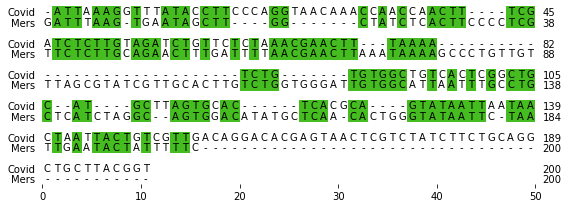

In [59]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(111)
graphics.plot_alignment_similarity_based(
    ax, c_alignments[0], matrix=n_matrix, labels=["Covid", "Mers"],
    show_numbers=True, show_line_position=True
)
fig.tight_layout()

plt.show()

In [60]:
# How identical
c_alignments[0].score

205

In [61]:
# Seq Identity
align.get_sequence_identity(c_alignments[0])

0.49767441860465117